In [50]:
import os
import glob
import numpy as np
import pandas as pd

In [51]:
path="D:\Intern Training"

In [52]:
# folder and subfolder path  
def complete_data(path : str) -> None:
    """
    Store paths of all file folders 

    Parametrs
    ---------
    path
        Path of directory

    Return
    ------
    None
    """
    list_of_directory_content=[]
    list_individual_dir_content=glob.glob(path+'/*')
    list_of_directory_content.append(list_individual_dir_content)
    for directory_data in list_of_directory_content:
        for direct in directory_data:
            if os.path.isdir(direct):
                list_of_directory_content.append(glob.glob(direct+'/*'))
    return  list_of_directory_content, list_individual_dir_content  
    

In [53]:
list_of_directory_content, list_individual_dir_content=complete_data(path=path)

In [ ]:
# list_of_directory_content

In [331]:
from typing import List

In [55]:

# function to sort files according to the extension
def extsort(files : List[str] ) -> List[str]:
    """
    Sort files according to extension

    Parameters
    ----------
    files
        list of files to sort
    
    Return
        list of sorted files

    """
    return sorted(files,key=lambda x: os.path.splitext(x)[1])

80

In [84]:
#Get size of files and folders
temp_size_dir={}
def getFolderSize(folder):
    """
    Recursively find size of folder and files

    Parameters
    ---------
    folders
        folder path for calculating size
    
    Return 
    ------
    None
    """
    total_size = 0
    for item in os.listdir(folder):
        itempath = os.path.join(folder, item)
        if os.path.isfile(itempath):
            temp_size_dir[itempath] = os.path.getsize(itempath)
            total_size += temp_size_dir[itempath]
        elif os.path.isdir(itempath):
            temp_size_dir[itempath]= getFolderSize(itempath)
            total_size += temp_size_dir[itempath]
    return total_size
print(path)
print ("Size: " + str(getFolderSize(path)))

D:\Intern Training
Size: 31960584


In [90]:
temp_size_dir["D:\Intern Training"] = 31960584/(1024)

In [60]:
key_list=[]

In [61]:
i=0
for data in temp_size_dir:
    key_list.append(data)
    #print(data,":",temp_size_dir[data])
    i+=1
print(i) 

86


In [62]:
key_list=extsort(key_list)

In [ ]:
#key_list[0:100]

In [64]:
value=[]

In [94]:
#Turn bytes into kilo bytes and round off upto 3 decima 
for i in range(len(temp_size_dir)):
    temp_size_dir[key_list[i]]=round(temp_size_dir[key_list[i]]/ (1024),3)
# /1024*1024

In [66]:
# for i in range(len(temp_size_dir)):
#     value.append(temp_size_dir[key_list[i]])


In [95]:
temp_size_dir

{'D:\\Intern Training\\app.py': 0.168,
 'D:\\Intern Training\\Articles\\A Dynamic Points Removal Benchmark in Point Cloud Maps.pdf': 2681.328,
 'D:\\Intern Training\\Articles\\Artificial Intelligence for Science in Quant,Atomistic and Contimum System.pdf': 23423.043,
 'D:\\Intern Training\\Articles\\Locally Adaptive Federated Learning.pdf': 1633.108,
 'D:\\Intern Training\\Articles\\Secrets_of_RLHF_in_LLM_p1PP0.pdf': 2037.774,
 'D:\\Intern Training\\Articles': 29775.254,
 'D:\\Intern Training\\Core Concept\\.vscode\\settings.json': 0.127,
 'D:\\Intern Training\\Core Concept\\.vscode': 0.127,
 'D:\\Intern Training\\Core Concept\\core_module_12_July.py': 2.884,
 'D:\\Intern Training\\Core Concept\\display_func.log': 0.269,
 'D:\\Intern Training\\Core Concept\\main_12_July.py': 0.741,
 'D:\\Intern Training\\Core Concept\\za.log': 0.0,
 'D:\\Intern Training\\Core Concept\\__pycache__\\core.cpython-310.pyc': 3.449,
 'D:\\Intern Training\\Core Concept\\__pycache__': 3.449,
 'D:\\Intern Train

In [109]:
temp_size_dir["D:\Intern Training\Prize Task"]

9.534

In [ ]:
# %%!
stack_dir={}
stack_value=[]
x_value=[]
index=key_list.index("D:\Intern Training")
temp_data=os.listdir(path)
# print(temp_data)
for files in temp_data:
    print(path+'\\'+files)
    if os.path.isdir(path+"\\"+files):
        x_value.append(files)
        stack_value.append(temp_size_dir[path+"\\"+files])

x_value

In [124]:
temp_size_dir

dict

In [143]:
# prepparing data for storing in file
name=[]
size_of_file_direct=[]
unit_of_size=[]
parent_dir=[]
extension=[]
for data in temp_size_dir:
    name.append(data)
    parent_dir.append(os.path.dirname(data))
    siz = temp_size_dir[data]
    if siz//(1024) > 0:
        size_of_file_direct.append(temp_size_dir[data]/(1024))
        unit_of_size.append("MB")  #for MB
    else:
        size_of_file_direct.append(temp_size_dir[data])
        unit_of_size.append("KB")   #0 for kb
    if os.path.isfile(data):
        file,ext=os.path.splitext(data)
        extension.append(ext)
    else:
        extension.append(np.nan)

    

In [136]:
len(name)

86

In [144]:
df={
    "name" : name,
    "size" : size_of_file_direct,
    "unit_of_size" : unit_of_size,
    "parent_dir"   : parent_dir,
     "extension"   : extension
}

In [145]:
#convert data into dataframe and store in csv file
dir_dataframe=pd.DataFrame(df)
dir_dataframe.to_csv("Directory_Data.csv")

In [146]:
dir_dataframe.head(20)

,name,size,unit_of_size,parent_dir,extension
0,D:\Intern Training\app.py,0.168000,KB,D:\Intern Training,.py
1,D:\Intern Training\Articles\A Dynamic Points R...,2.618484,MB,D:\Intern Training\Articles,.pdf
2,D:\Intern Training\Articles\Artificial Intelli...,22.874065,MB,D:\Intern Training\Articles,.pdf
3,D:\Intern Training\Articles\Locally Adaptive F...,1.594832,MB,D:\Intern Training\Articles,.pdf
4,D:\Intern Training\Articles\Secrets_of_RLHF_in...,1.990014,MB,D:\Intern Training\Articles,.pdf
5,D:\Intern Training\Articles,29.077396,MB,D:\Intern Training,NaN
6,D:\Intern Training\Core Concept\.vscode\settin...,0.127000,KB,D:\Intern Training\Core Concept\.vscode,.json
7,D:\Intern Training\Core Concept\.vscode,0.127000,KB,D:\Intern Training\Core Concept,NaN
8,D:\Intern Training\Core Concept\core_module_12...,2.884000,KB,D:\Intern Training\Core Concept,.py
9,D:\Intern Training\Core Concept\display_func.log,0.269000,KB,D:\Intern Training\Core Concept,.log


In [ ]:
import matplotlib.pyplot as plt


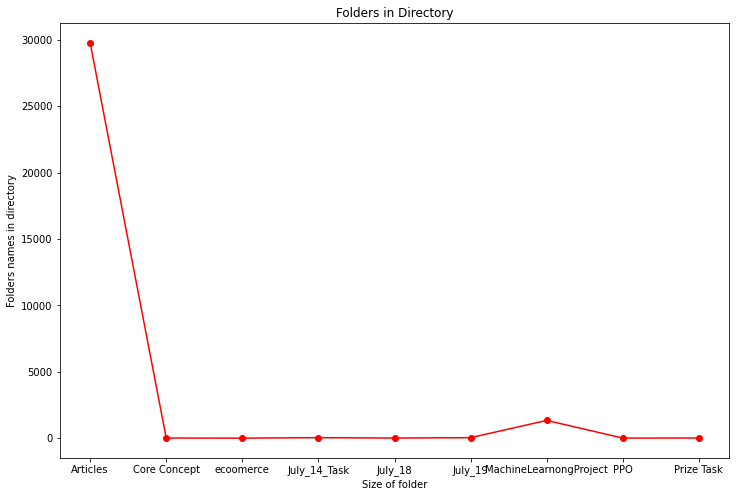

In [121]:
plt.figure(figsize=(12,8))
plt.plot(x_value,stack_value, marker="o",color="red")
plt.title("Folders in Directory")
plt.xlabel("Size of folder")
plt.ylabel("Folders names in directory")
plt.show()

Number of Folders and File

In [148]:
number_of_folder=dir_dataframe.extension.isna().sum()
number_of_folder

24

In [149]:
number_files=len(dir_dataframe) - number_of_folder
number_files

62

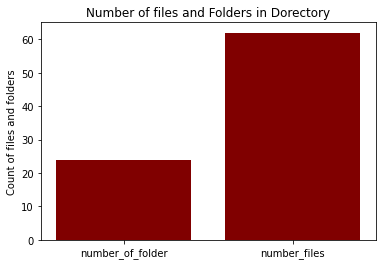

In [152]:
plt.bar(x=["number_of_folder","number_files"], height=[number_of_folder,number_files], color="maroon")
plt.title("Number of files and Folders in Directory")
plt.ylabel("Count of files and folders")
plt.show()

**Files in Megabyte and Kilo Bytes**

In [163]:
print(len(dir_dataframe[dir_dataframe["extension"] == ".py"]))


22


In [167]:
ext1 = dir_dataframe.extension.unique()
segregate_files_according_ext=[]
for ex in ext1:
    segregate_files_according_ext.append(len(dir_dataframe[dir_dataframe["extension"] == ex]))
    

In [189]:
type(ext[2])

str

In [198]:
ext1_1=list(ext1)
cleanedList = [x for x in ext1 if not pd.isna(x) ]
ext1=np.array(cleanedList)
segregate_files_according_ext=[x for x in segregate_files_according_ext if x!=0]
segregate_files_according_ext

In [201]:
segregate_files_according_ext=[x for x in segregate_files_according_ext if x!=0]
segregate_files_according_ext

[22, 4, 4, 2, 9, 15, 5, 1]

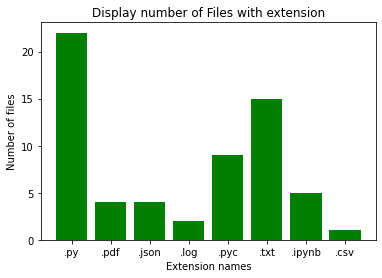

In [203]:
plt.bar(x=ext1.astype(str),height=segregate_files_according_ext,color="green")
plt.title("Display number of Files with extension")
plt.ylabel("Number of files")
plt.xlabel("Extension names")
plt.show()

<AxesSubplot:>

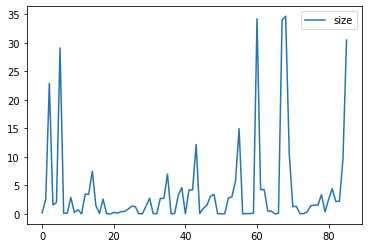

In [204]:
dir_dataframe.plot()

**Size of File in MB and KB**

In [205]:
unit_size=[]
unit_size.append(len(dir_dataframe[dir_dataframe["unit_of_size"] == "MB"]))
unit_size.append(len(dir_dataframe[dir_dataframe["unit_of_size"] == "KB"]))

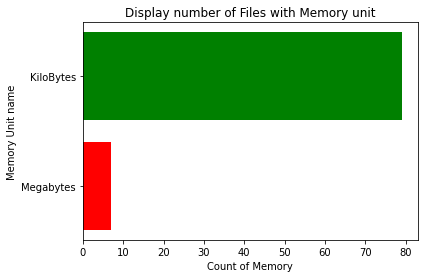

In [327]:
#number of files that have size in KB and MB
plt.barh(["Megabytes","KiloBytes"],unit_size,color=["red","green"])
plt.title("Display number of Files with Memory unit")
plt.xlabel("Count of Memory")
plt.ylabel("Memory Unit name")
plt.show()

In [319]:
del1=dir_dataframe[["name","parent_dir"]].groupby("parent_dir").sum()
del1.name[1]

'D:\\Intern Training\\app.pyD:\\Intern Training\\ArticlesD:\\Intern Training\\Core ConceptD:\\Intern Training\\Core Concept Python.txtD:\\Intern Training\\coureWithMosh.pyD:\\Intern Training\\courseWithMosh.ipynbD:\\Intern Training\\ecoomerceD:\\Intern Training\\July 12,2023.txtD:\\Intern Training\\July 13,2023.txtD:\\Intern Training\\July 17.txtD:\\Intern Training\\July_14_TaskD:\\Intern Training\\July_18D:\\Intern Training\\July_19D:\\Intern Training\\MachineLearnongProjectD:\\Intern Training\\PPOD:\\Intern Training\\Prize Task'

**for files in folders**

In [ ]:

# var=list(del1.name)

# for dat in var:
#     token=dat.split("D:")
#     print(token)
#     print("--------")

In [291]:
file_in_folders=dir_dataframe[["name","parent_dir"]].groupby("parent_dir").count()
number=list(file_in_folders.name)


In [277]:
foldername = dir_dataframe[dir_dataframe["extension"].isna()]

In [296]:
fol_name=list(foldername.name)

In [305]:
fol_name

['D:\\Intern Training\\Articles',
 'D:\\Intern Training\\Core Concept\\.vscode',
 'D:\\Intern Training\\Core Concept\\__pycache__',
 'D:\\Intern Training\\Core Concept',
 'D:\\Intern Training\\ecoomerce\\__pycache__',
 'D:\\Intern Training\\ecoomerce',
 'D:\\Intern Training\\July_14_Task\\Task1\\__pycache__',
 'D:\\Intern Training\\July_14_Task\\Task1',
 'D:\\Intern Training\\July_14_Task\\Task2\\__pycache__',
 'D:\\Intern Training\\July_14_Task\\Task2',
 'D:\\Intern Training\\July_14_Task\\Task3\\__pycache__',
 'D:\\Intern Training\\July_14_Task\\Task3',
 'D:\\Intern Training\\July_14_Task\\Task4',
 'D:\\Intern Training\\July_14_Task',
 'D:\\Intern Training\\July_18',
 'D:\\Intern Training\\July_19\\.vscode',
 'D:\\Intern Training\\July_19',
 'D:\\Intern Training\\MachineLearnongProject',
 'D:\\Intern Training\\PPO\\.vscode',
 'D:\\Intern Training\\PPO\\__pycache__',
 'D:\\Intern Training\\PPO',
 'D:\\Intern Training\\Prize Task\\__pycache__',
 'D:\\Intern Training\\Prize Task',
 'D:\

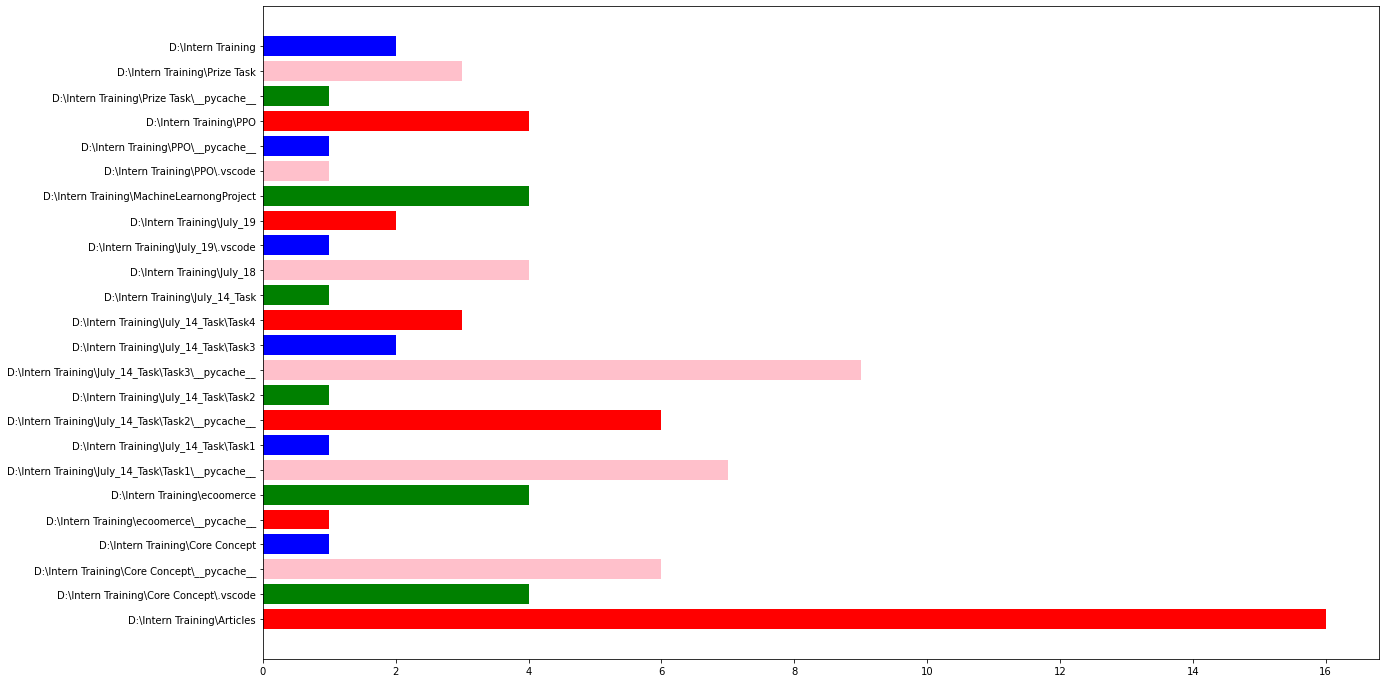

In [304]:
#number of files in folder
plt.figure(figsize=(20,12))
plt.barh(fol_name,number,color=["red","green","pink","blue"])
plt.show()

In [247]:
file_in_folders.columns

Index(['name'], dtype='object')

In [210]:
dir_dataframe.columns

Index(['name', 'size', 'unit_of_size', 'parent_dir', 'extension'], dtype='object')

In [229]:
#create pivot table 
pivot_table=dir_dataframe.pivot_table(index=["name"],columns=["parent_dir","unit_of_size"],values=["size"])

In [213]:
import seaborn as sns

c:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [330]:
# display pivot table create a files and folder name
# in y-axis and parent directory and unit become column name 
# and cells give size of file and folders
from IPython.display import HTML
def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "150%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
# html = (pivot_table.style.set_table_styles(styles)
#           .set_caption("Hover to highlight."))
# html

In [235]:
#  Pivot table with visualization 
(pivot_table.style
 .set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})
                           .set_na_rep("Nahi Haa")
   .highlight_null("white")
   .set_table_styles(styles)
   .set_caption("Hover to highlight."))

C:\temp\ipykernel_8268\3839881774.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(na_rep=..)`
  .set_na_rep("Nahi Haa")


In [225]:
(pivot_table.style
   .set_na_rep("NaN")
   .highlight_null("yellow")
   )

C:\temp\ipykernel_8268\4145691890.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(na_rep=..)`
  .set_na_rep("NaN")
